# Generating Closure Phases from Visibility Data
In this notebook I show how to generate closure phases directly from HERA visibilities.

In [6]:
import sys
sys.path.append('/users/pkeller/code/H6C/') # set this to your code directory

import h5py
import numpy as np
from closurelib import clquants 

import matplotlib.pyplot as plt

In [7]:
# path to HERA uvh5 file
visfile = "/lustre/aoc/projects/hera/pkeller/data/H6C/tmp/2459862/zen.2459862.59668.sum.uvh5"

# time index
time_idx = 0

# read uvh5
f = h5py.File(visfile, "r+")

# generate closure phase data. This takes about 90 s for one triad.
cp = clquants.closurePh(f, time_idx, trlist=[[7, 8, 19],])

# 1 triad, 1536 channels, 2 polarisations
print(cp["phase"].shape)

(1, 1536, 2)


## Plot

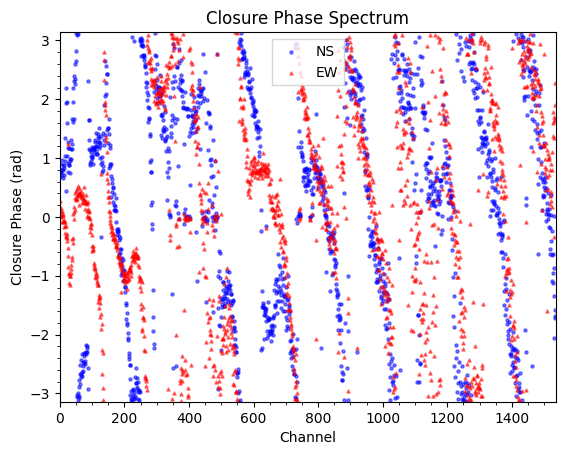

In [19]:
channels = np.arange(cp["phase"].shape[1])

plt.title("Closure Phase Spectrum")

# NS polarisation product
plt.scatter(channels, cp["phase"][0, ..., 0], alpha=0.5, color="b", marker="o", s=5, label="NS")

# EW polarisation product
plt.scatter(channels, cp["phase"][0, ..., 1], alpha=0.5, color="r", marker="^", s=5, label="EW")

plt.xlim([0, cp["phase"].shape[1]])
plt.ylim([-np.pi, np.pi])

plt.xlabel("Channel")
plt.ylabel("Closure Phase (rad)")

plt.minorticks_on()
plt.legend(fancybox=False)